In [20]:
import pandas as pd
import numpy as np

shark_df = pd.read_excel('./shark-dataset.xls')
# create dataframe copy
original_df = shark_df.copy()
shark_df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,...,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-11 00:00:00,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,...,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-17 00:00:00,2024.0,Unprovoked,Honduras,Trujillo Colon,Puerto Castillo,Diving for shellfish,Fernando Mendoza Ocampo,M,33,...,Bull shark 6-7ft,Daily Mail UK: The Sun UK: The World Watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,...,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,...,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6969,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6970,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6971,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


Data cleaning to-do's:
- (done) column names to lowercase
- (done) column names - remove empty space after name
- (done) column names - replace empty spaces with underscores
- find unique values in columns
- find duplicate rows
- year names without floating
- column 'Unnamed: 21' & 'Unnamed: 22' - what do we do with them?

In [22]:
# column names to lowercase, remove empty space in the end, replace empty spaces with underscore
shark_df.columns = shark_df.columns.str.lower().str.strip().str.replace(" ", "_")

# remove multiple columns:
shark_df = shark_df.drop(['type', 'state', 'name', 'species', 'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1', 'original_order', 'unnamed:_21', 'unnamed:_22', 'time'], axis=1)

# convert year values to int
# shark_df['year'] = shark_df['year'].apply(lambda x: int(x) if isinstance(x, float) else x)
shark_df

,date,year,country,location,activity,sex,age,injury,unnamed:_11
0,2024-10-14 00:00:00,2024.0,Honduras,Atlantida,Swimming,M,38,Back and thigh extensive tissue loss,N
1,2024-10-11 00:00:00,2024.0,USA,Brevard County Orlando,Surfing,M,16,Bite to left arm,N
2,2024-09-17 00:00:00,2024.0,Honduras,Puerto Castillo,Diving for shellfish,M,33,Bite to left leg,N
3,2024-09-16 00:00:00,2024.0,Morocco,West of Dakhla,Swimming - jumped off yacht,F,30,Leg severed,Y
4,2024-08-26 00:00:00,2024.0,Jamaica,Falmouth,Spearfishing,M,16,Head right arm and leg severed,Y
...,...,...,...,...,...,...,...,...,...
6968,Before 1903,0.0,AUSTRALIA,Roebuck Bay,Diving,M,NaN,FATAL,Y
6969,Before 1903,0.0,AUSTRALIA,NaN,Pearl diving,M,NaN,FATAL,Y
6970,1900-1905,0.0,USA,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y
6971,1883-1889,0.0,PANAMA,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y


TUNG: YEARS
---

In [23]:
dft = shark_df

# Filter the DataFrame because years date back to the birth of jesus christ, our lord and saviour. 
start_year = 2014
end_year = 2024

dft = shark_df[(shark_df["year"] >= start_year) & (shark_df["year"] <= end_year)]

#convert float in year to int
#this way doesn't convert into int, but error messages disappears, WHYYYY
dft["year"] = dft["year"].fillna(0).astype(int)

#this conversion works, however the stupid error message 
#year_filtered_dft["year"] = year_filtered_dft["year"].apply(lambda x : int(x))

# showing that there are NO NaNs in date and year; 
print(dft.isnull().sum())
print("\nThe unique values in year are:\n", dft.year.unique())
print("\nThe datatype for column is currently:\n", dft.year.dtype)

dft

In [24]:
from datetime import datetime
import pandas as pd
import re



# Function to parse different date formats
def parse_date(date_str):
    if isinstance(date_str, str):
        try: 
            return pd.to_datetime(date_str)  # Try direct conversion
        except ValueError:
            match = re.search(r'(\d{4}-\d{1,2}-\d{1,2}|\d{1,2}-[A-Za-z]{3}-\d{4}|\b[A-Za-z]{3}-\d{4}\b)', date_str)
            if match:
                date_str = match.group(0)
                try:
                    return datetime.strptime(date_str, "%Y-%m-%d")
                except ValueError:
                    try:
                        return datetime.strptime(date_str, "%d-%b-%Y")
                    except ValueError:
                        try:
                            return datetime.strptime(date_str, "%b-%Y")
                        except ValueError:
                            return None  # Return None for invalid formats
    elif isinstance(date_str, datetime):
        return date_str  # Return the datetime object as is
    return None  # Return None if not a string or datetime

# Create datetime_column and string_column
dft["datetime_column"] = dft["date"].apply(parse_date)
dft["string_column"] = dft["date"].apply(lambda x: x if isinstance(x, str) else None)

# Drop rows with invalid datetime values
dft = dft[dft["datetime_column"].notna()]

# Extract month and year from datetime_column
dft['month'] = dft["datetime_column"].apply(lambda x: x.month if pd.notnull(x) else None)
dft['year'] = dft["datetime_column"].apply(lambda x: x.year if pd.notnull(x) else None)
#dft['month'] = dft["datetime_column"].dt.month
#dft['year'] = dft["datetime_column"].dt.year

# Define season mapping
season_mapping = {
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Autumn": [9, 10, 11],
    "Winter": [12, 1, 2]
}

# Function to assign season based on month
def what_season(month):
    for season, months in season_mapping.items():
        if month in months:
            return season
    return None

# Assign season based on the extracted month
dft['season'] = dft['month'].apply(what_season)

# Check the resulting DataFrame
print(dft[['date', 'datetime_column', 'string_column', 'year', 'month', 'season']])




                  date datetime_column string_column    year  month season
0  2024-10-14 00:00:00            None          None  2024.0    NaN   None
1  2024-10-11 00:00:00            None          None  2024.0    NaN   None
2  2024-09-17 00:00:00            None          None  2024.0    NaN   None
3  2024-09-16 00:00:00            None          None  2024.0    NaN   None
4  2024-08-26 00:00:00            None          None  2024.0    NaN   None

              date      datetime_column string_column    year  month  season
1226  07-Feb-2014  2014-02-07 00:00:00   07-Feb-2014  2014.0    2.0  Winter
1227  07-Feb-2014  2014-02-07 00:00:00   07-Feb-2014  2014.0    2.0  Winter
1228  26-Jan-2014  2014-01-26 00:00:00   26-Jan-2014  2014.0    1.0  Winter
1229  25-Jan-2014  2014-01-25 00:00:00   25-Jan-2014  2014.0    1.0  Winter
1230  04-Jan-2014  2014-01-04 00:00:00   04-Jan-2014  2014.0    1.0  Winter

Number of NaNs in 'date': 0
Number of NaNs in 'year': 0


C:\Users\manht\AppData\Local\Temp\ipykernel_23928\1906153339.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft["datetime_column"] = dft["date"].apply(parse_date)
C:\Users\manht\AppData\Local\Temp\ipykernel_23928\1906153339.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft["string_column"] = dft["date"].apply(lambda x: x if isinstance(x, str) else None)


extras

groups_by_seanson_and_injury = dft.groupby(["season", "injury"])
groups_by_seanson_and_injury.get_group("Autumn")


# Country

In [10]:
# Johanna - country and location
dfj = shark_df.copy()

# unique countries
dfj.country.unique() # many many countries (unsure values and very small countries)
top_20_countries = dfj.country.value_counts().head(20)

# stick to top 20 countries
dfj = dfj[dfj.country.isin(top_20_countries.index)] # deletes around 1000 of originally 6900 rows

# first letter in uppercase for all countries except USA for consistency
dfj.country = dfj.country.apply(lambda x: x.title() if x != 'USA' else x)
dfj.head()

,date,year,country,location,activity,sex,age,injury,unnamed:_11
1,2024-10-11 00:00:00,2024.0,USA,Brevard County Orlando,Surfing,M,16,Bite to left arm,N
8,2024-07-08 00:00:00,2024.0,USA,Ponce de Leon Inlet Volusia County,Diving into Water,M,14,Lower left leg injury,N
9,2024-07-05 00:00:00,2024.0,USA,New Smyrna Beach,Wading,M,26,Minor injury to left foot,N
10,2024-07-04 00:00:00,2024.0,USA,South Padre Island,Swimming,F,Middle age,Bite to left leg calf muscle removed,N
11,2024-07-04 00:00:00,2026.0,USA,South Padre Island,Swimming,F,18,Minor cuts to calf,N


In [12]:
#drop location column
dfj_USA = dfj[dfj.country.isin(['USA'])]
dfj_USA.head()
dfj_USA.location.unique() # too complicated --> stick to USA overall

array(['Brevard County Orlando', 'Ponce de Leon Inlet Volusia County',
       'New Smyrna Beach', ..., 'Capistrano, Orange County',
       'Somewhere between Hatteras and Beaufort', 'Ocracoke Inlet'],
      dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_35977/3002767570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_countries.index.str.title(), y=top_20_countries.values, palette='viridis')


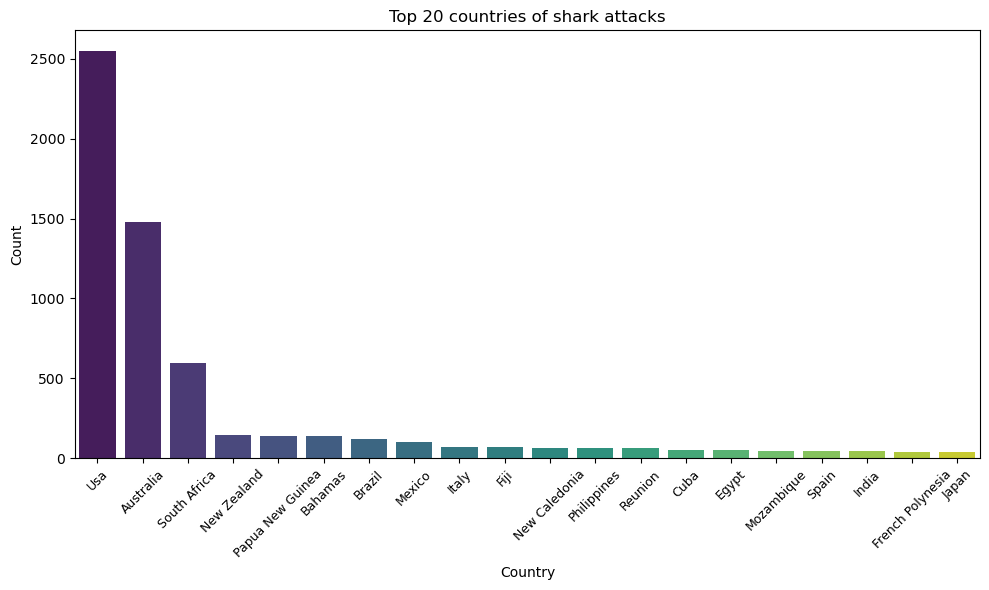

In [16]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_countries.index.str.title(), y=top_20_countries.values, palette='viridis')
plt.title('Top 20 countries of shark attacks')
plt.xlabel('Country')
plt.tick_params(axis='x', labelsize=9)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Jonathan - sex wrangling

#my copy of df
jon_df = shark_df.copy()

#check unique values
unique_values_sex = jon_df['sex'].value_counts(dropna=False)
print(f"Unique values before cleaning: {unique_values_sex}")

# Remove extra spaces
jon_df['sex'] = jon_df['sex'].str.strip()

# Replace specific values
jon_df['sex'] = jon_df['sex'].replace({
    'M': 'M',  # Standard "M"
    'F': 'F',  # Standard "F"
    'N': np.nan,  # Likely an error or placeholder, so set as NaN
    'M x 2': 'M',  # Assuming this means "male," so map to "M"
    'lli': np.nan,  # Unrecognized value, replace with NaN
    '.': np.nan,  # Unrecognized value, replace with NaN
    ' M': 'M'  # Correct extra space for "M"
})

jon_df['sex']= jon_df['sex'].fillna('unknown')

#replaced NaN as unknown for now? Suggestion: change the unknown values to M or F based on the percentage of M and F we do know. 
# eg. total M is 88% of total, and F is 12%. Apply those percentages to the unknown values.

# Step 1: Calculate the counts of "M" and "F"
total_known = jon_df['sex'].value_counts()
m_count = total_known.get('M', 0)
f_count = total_known.get('F', 0)
total = m_count + f_count

# Step 2: Calculate the percentages of "M" and "F"
if total > 0:
    m_percentage = m_count / total
    f_percentage = f_count / total
else:
    m_percentage = 0.5  # Default to equal distribution if no known values
    f_percentage = 0.5

# Step 3: Determine the number of "Unknown" values
unknown_count = jon_df['sex'].value_counts().get('unknown', 0)

# Step 4: Calculate how many "Unknown" values to fill with "M" and "F"
m_fill_count = int(m_percentage * unknown_count)
f_fill_count = unknown_count - m_fill_count  # Ensure all "Unknown" are assigned

# Step 5: Get indices of the "Unknown" entries
unknown_indices = jon_df[jon_df['sex'] == 'unknown'].index

# Step 6: Randomly shuffle the "Unknown" indices
shuffled_indices = np.random.permutation(unknown_indices)

# Step 7: Split the shuffled indices into two groups for "M" and "F"
m_indices = shuffled_indices[:m_fill_count]
f_indices = shuffled_indices[m_fill_count:]

# Step 8: Assign "M" and "F" to the split indices
jon_df.loc[m_indices, 'sex'] = 'M'
jon_df.loc[f_indices, 'sex'] = 'F'

# Verify replacements by checking updated counts
print(jon_df['sex'].value_counts())

unique_values_sex = jon_df['sex'].value_counts(dropna=False)
print(f"Unique values after cleaning: {unique_values_sex}")



In [20]:
# Jonathan - age wrangling

import numpy as np

# Set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Show all unique values in the 'age' column, including NaN counts
unique_values_age = jon_df['age'].value_counts(dropna=False)
print(f"Unique values before cleaning:\n{unique_values_age}")

# Reset the display option back to default to avoid affecting other output
pd.reset_option('display.max_rows')

In [36]:
import re

# Step 1: Handle common descriptive terms with approximate ages
def convert_descriptive_age(value):
    if pd.isnull(value):
        return np.nan
    value = str(value).strip().lower()
    if value in ["teen", "teens"]:
        return 15  # Approximate age for teenagers
    elif value == "adult":
        return 30  # General average for adult age
    elif value in ["middle age", '"middle-age"']:
        return 45  # Approximate age for middle age
    elif value == "elderly":
        return 70  # Approximate age for elderly
    elif value in ["a minor", "young"]:
        return 10  # Assume a minor is around 10 years old
    elif value == "infant" or value == "9 months" or value == "2 to 3 months":
        return 1  # Age 1 for infants
    elif "month" in value:
        return 1  # Treat other month values as infants
    return value

jon_df['age'] = jon_df['age'].apply(convert_descriptive_age)

def convert_to_first_age(value):
    if isinstance(value, str):
        # Extract first number found in the string, ignoring the rest
        numbers = re.findall(r'\d+', value)
        if numbers:
            return int(numbers[0])  # Use the first number as the age
    return value

jon_df['age'] = jon_df['age'].apply(convert_to_first_age)

def convert_half_age(value):
    if isinstance(value, str) and "½" in value:
        # Replace "½" with ".5" and convert to float
        return float(value.replace("½", ".5"))
    return value  # Return unchanged if not fractional

jon_df['age'] = jon_df['age'].apply(convert_half_age)


# Step 4: Convert any remaining irregular entries to NaN
def convert_irregular_entries(value):
    if isinstance(value, str) and not any(char.isdigit() for char in value):
        return np.nan  # If no digits, set it to NaN
    return value

jon_df['age'] = jon_df['age'].apply(convert_irregular_entries)

# Step 5: Ensure the column is numeric
jon_df['age'] = pd.to_numeric(jon_df['age'], errors='coerce')

# Step 6: Replace NaN values with the mode of the age column
age_mode = jon_df['age'].mode()[0]
jon_df['age'] = jon_df['age'].fillna(age_mode)

jon_df['age'] = jon_df['age'].astype(int)

# Set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Show all unique values in the 'age' column, including NaN counts
unique_values_age = jon_df['age'].value_counts(dropna=False)
print(f"Unique values after cleaning:\n{unique_values_age}")

# Reset the display option back to default to avoid affecting other output
pd.reset_option('display.max_rows')



In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_counts = jon_df['sex'].value_counts()
print(gender_counts)

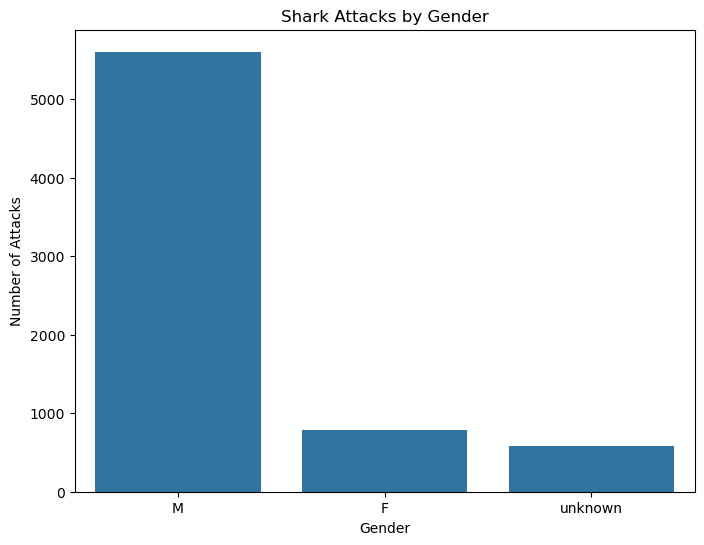

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=jon_df, order=gender_counts.index)
plt.title('Shark Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Attacks')
plt.show()

In [42]:
age_bins = [0, 17, 30, 50, 100]  # Define bins for age ranges
age_labels = ['0-17', '18-30', '31-50', '51+']
jon_df['age_group'] = pd.cut(jon_df['age'], bins=age_bins, labels=age_labels)

# Verify age group counts
age_group_counts = jon_df['age_group'].value_counts().sort_index()
print(age_group_counts)

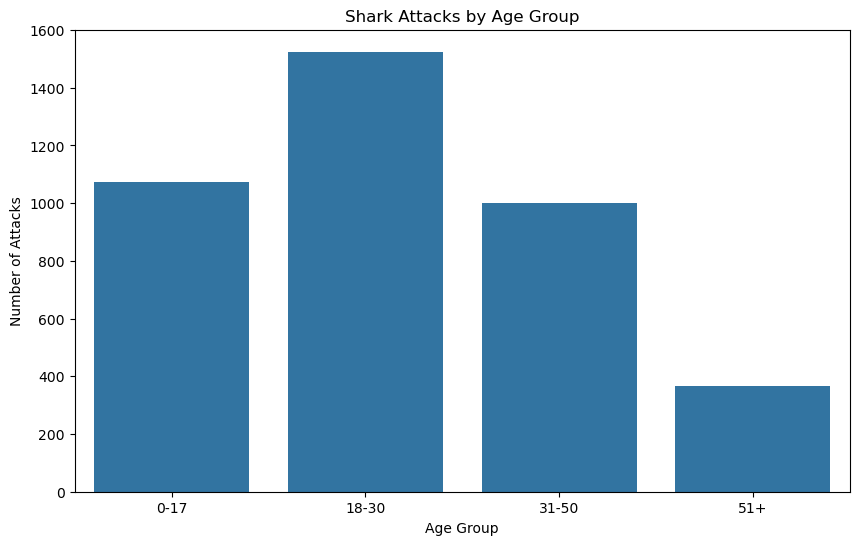

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=jon_df, order=age_group_counts.index)
plt.title('Shark Attacks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Attacks')
plt.show()

In [200]:
# Bru - fatality wrangling

#copy df for safety reasons
bru_df = shark_df.copy()

# rename column
bru_df.rename(columns={'unnamed:_11': 'fatal'}, inplace=True)

# check unique values
unique_values_fatal = bru_df['fatal'].unique()
print(f"Unique values before cleaning: {unique_values_fatal}")

# replace values
bru_df['fatal'] = bru_df['fatal'].replace({'N':'no','Y':'yes','n':'no','Y x 2':'yes',' N':'no','N ':'no','y':'yes','UNKNOWN':'unknown'})

# remove rows with specific values
rows_to_remove = ['Nq', 'M', 'F', 2017]
bru_df = bru_df[~bru_df['fatal'].isin(rows_to_remove)]

#drop rows with NaN values
bru_df = bru_df.dropna(subset=['fatal'])

# check again
unique_values_fatal = bru_df['fatal'].unique()
print(f"Unique values after cleaning: {unique_values_fatal}")

# print(bru_df.describe())
print(bru_df.groupby('fatal').count())

fatality_counts = bru_df['fatal'].value_counts()
print("fatality counts", fatality_counts)

Unique values before cleaning: ['N' 'Y' nan 'M' 'F' 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']
Unique values after cleaning: ['no' 'yes' 'unknown']
         date  year  country  location  activity   sex   age  injury
fatal                                                               
no       4867  4867     4848      4568      4555  4507  3036    4861
unknown    71    71       69        60        36    40    10      51
yes      1465  1464     1441      1269      1355  1358   688    1464
fatality counts fatal
no         4867
yes        1465
unknown      71
Name: count, dtype: int64


In [204]:
# fatality wrangling with tung's dataframe (2014 to 2024)

import numpy as np
# copy of tung's df
fatal_df = dft.copy()

# rename column
fatal_df.rename(columns={'unnamed:_11': 'fatal'}, inplace=True)

replacement_dict = {
    'N': 'no',
    'Y': 'yes',
    'M': 'unknown',
    'F': 'unknown',
    'n': 'no',
    'Nq': 'unknown'
}

#fill NaN vals with 'unknown' and replace unique values
fatal_df['fatal'] = fatal_df['fatal'].fillna('unknown').replace(replacement_dict)

fatality_counts = fatal_df['fatal'].value_counts()
display("fatality counts", fatality_counts)

fatality counts fatal
no         1055
yes         100
unknown      73
Name: count, dtype: int64


In [45]:
# Bru - activity wrangling
from collections import Counter
import re

# check unique values
unique_values_activity = bru_df['activity'].unique()
# print(unique_values_activity)

# convert all values to a common case
bru_df['activity'] = bru_df['activity'].str.strip().str.lower().str.replace(r"[\"']", '', regex=True)

'''
The word_count() function uses collections and re to concatenate all the values in the column to a single string.
Then it will split the combined string into individual words.
Using Counters, it will return the frequency of each word.
It will also store the top 10 most common words in a list
'''

most_common_words = []

def word_count():
    bru_df['activity'] = bru_df['activity'].fillna('').astype(str) # replace NaN values with an empty string and convert all to string
    all_text = ' '.join(bru_df['activity']) # combine all values into a single string
    words = re.findall(r'\w+', all_text.lower()) # split into words (regex to handle punctuation)
    word_counts = Counter(words) # count word frequency
    most_common_words = [word for word, count in word_counts.most_common(50) if len(word) >= 5]
    return most_common_words
    return word_count

word_count()
most_common_words = word_count()

#print("Most common words")
#print(most_common_words)

print('Top values before replacement function\n', bru_df['activity'].value_counts().head(10))
#manually entered seoelcted values
selected_values_to_replace = ['surfing', 'diving', 'fishing', 'swimming', 'wading', 'bathing', 'snorkeling', 'kayaking', 'body boarding', 'scuba diving']


def replace_values():
    for word_to_replace in selected_values_to_replace:
        bru_df.loc[bru_df['activity'].str.contains(word_to_replace, case=False, na=False), 'activity'] = word_to_replace

    return bru_df

updated_bru_df = replace_values()

print('\nTop values after replacement:\n', updated_bru_df['activity'].value_counts().head(10))

# print("Word count:")
# print(word_counts_df)

Top values before replacement function
 activity
surfing         1089
swimming         932
fishing          482
                 459
spearfishing     365
wading           167
bathing          151
diving           130
snorkeling       123
standing         114
Name: count, dtype: int64

Top values after replacement:
 activity
surfing          1247
fishing          1172
swimming         1112
diving            556
                  459
wading            181
bathing           176
snorkeling        130
standing          114
body boarding      70
Name: count, dtype: int64


/tmp/ipykernel_320162/1626314217.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')


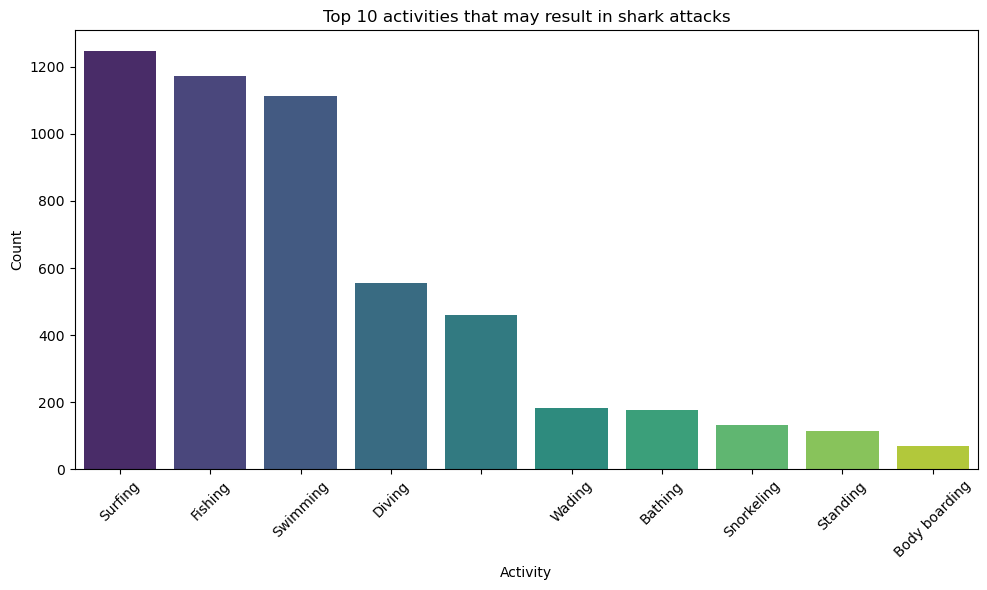

In [47]:
# playing with visual representation
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 10 values in the 'activity' column
top_values = updated_bru_df['activity'].str.capitalize().value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')
plt.title('Top 10 activities that may result in shark attacks')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Columns we need in the project
- Years
- date (months?)
- activity (can we stand on a beach?)
- country/state/location -> do we need all? let's start with country + location and see how messy it gets from then on?
- age - hospital costs might change
- sex
- unnamed 11 (fatal or not) yes for fatal
- injury (how does that combine with activity type?)
- Jonathan adds column with organs lost

### Formula
probably looks like : who are you, where are you, what are you going to do and when? -> probability calculated through that (will it be fatal or not), and then the result can be checked into the three insurance categories

- location is going to be an important parameter here (another correlation to definitely check, big influential factor?)

- !POINT SYSTEM!

- add point system for column unique values (genius)

### Other parameters to take into account:
- comparison between years to calculate potential drama in upcoming years
- calculate probability based on different parameters
- we're g etting creepy

## Next steps
1. Select columns we will use
2. Inspect column data, see where we have null or empty values
3. Decide what to do with the above
4. 'homogenize' column values
5. Figure out calculations for probability. 